## Storage Usage with Prediction of Databases
* Weekly Top 5 Tablespaces Storage Utilization in a Database
* Storage Utilization of Specific Tablespace in a Database
* Storage Utilization of Specific Database

### Step 1. Load Db2 Extension
Before running all the following examples, you need to load the db2 driver so that you can use the magic command %sql.


The cell below will load the Db2 extension. Note that it will take a few seconds for the extension to load, so you should generally wait until message "Db2 Extensions Loaded" is displayed. You can find out more about the Db2 Extensions at https://github.com/DB2-Samples/db2jupyter.

In [3]:
%run db2.jupyter.ipynb

Pixiedust database opened successfully


DB2 Extensions Loaded.


### Step 2. Connect to Db2
Before any SQL commands can be issued, a connection needs to be made to your target database. This can be done by following command:

     %sql CONNECT TO [db_name] USER [user_name] USING [password]|[?] HOST [IP_address] PORT [port]

   * db_name - Database name. Here will be your DSM repository database
   * user_name - User ID
   * password - If using "?" for password, password need be input when prompted and click ENTER on key-board.
   * IP_address - localhost or IP address if you are connecting to a remote server
   * port - port number to connect your database
    
Message "Connection successful" will be displayed when the connection is created successfully. 

You can update the connection parameters and credential to another database if necessary.

In [24]:
%sql CONNECT TO test213 USER db2inst1 USING ? HOST 9.30.253.63 PORT 50002

Password [password]: ········
Connection successful.


### Parameter Description 
For each of following examples, we use "queryCondition" to pass value of 4 parameters to pull history data through repository view according to your requirement: 
* DB_CONN_ID: Connection name of monitor database you have added to DSM
* END_TIME: Target end time you want to query
* INTERVAL: int(1~100), stands for time period(hours) before the END_TIME
* REPORT_TYPE:
    1. database:
    1. tablespace:
   
Format of input: 
* queryCondition = "DB_CONN_ID='irww' END_TIME='2018-01-05-00:00:00' INTERVAL=18 REPORT_TYPE='database'"

Note: 
1. All parameters must be separated by whitespace
2. If any value of parameter is changed, you must click [Save and Checkpoint] to save the change before executing %run.

Details of implementation are in corresponding notebook storage-usage-with-prediction-scripts.jupyter.ipynb.


### Example 1: 
This example shows Top 5 tablespace storage utilization of a specific monitor database by week. Work with Example 2 to get storage usage and utilization information with prediction for a specific tablespace, you can get deep understanding how your tablespaces perform.
* TBSP_USED_SIZE_MB: The total usable size of the table space in MB.  

In [30]:
# load pandas for dataframe support and os for *** support
import pandas as pd
import os

# input value of parameters to pull history data through repository view
queryCondition = "DB_CONN_ID='irww' END_TIME='2018-04-24-00:00:00' INTERVAL=10 REPORT_TYPE='tbsp_table'"

# pass the values to a variable
!echo $queryCondition > storageCondition

# get content from the variable and pass values to select statement 
# run select statment to get storage utilization data for specified connection and save as a CSV file
# predict storage utilization in the near future
# display storage utilization together with preditive data in graph
%run Storage-usage-with-prediction-script.jupyter.ipynb

# set maximum rows of a table as general
pd.options.display.max_rows = 999

# define object for dataframe and pivot table
tbsp_df = None
tbsp_table = None

# check whether CSV file has been created which means select statement run successfully
# pass content of CSV to dataframe object
# draw pivot table according to dataframe
# and (len(GENERAL_ERROR) == 0)
if os.path.exists("tbsp.csv"):
    tbsp_df = pd.read_csv("tbsp.csv", index_col=0)
    tbsp_table = pd.pivot_table(tbsp_df,index=['DATE','HOUR','TBSP_NAME'], fill_value=0)
    
# display pivot table
tbsp_table

RANK  TBSP_FREE_SIZE_MB  TBSP_TOTAL_SIZE_MB  \
DATE       HOUR TBSP_NAME                                                 
2018-04-23 14   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE1     3              0.000              0.0039   
           15   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE1     3              0.000              0.0039   
           16   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE1     3              0.000              0.0039   
           17   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE1     3              0.000              0.0039   
           18   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE1     3              0.000              0.0039   
           19   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE2     3              0.000              0.0312   
           20   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE1     3              0.000              0.0039   
           21   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE1     3              0.000              0.0039   
           22   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE1     3              0.000              0.0039   
           23   DSMSPACE       2            477.000            500.0000   
                IRWWINDEX      1             24.375            160.0000   
                TEMPSPACE1     3              0.000              0.0039   

                            TBSP_USABLE_SIZE_MB  TBSP_USED_SIZE_MB  \
DATE       HOUR TBSP_NAME                                            
2018-04-23 14   DSMSPACE               499.0000            22.0000   
                IRWWINDEX              159.8750           135.5000   
                TEMPSPACE1               0.0039             0.0039   
           15   DSMSPACE               499.0000            22.0000   
                IRWWINDEX              159.8750           135.5000   
                TEMPSPACE1               0.0039             0.0039   
           16   DSMSPACE               499.0000            22.0000   
                IRWWINDEX              159.8750           135.5000   
                TEMPSPACE1               0.0039             0.0039   
           17   DSMSPACE               499.0000            22.0000   
                IRWWINDEX              159.8750           135.5000   
                TEMPSPACE1               0.0039             0.0039   
           18   DSMSPACE               499.0000            22.0000   
                IRWWINDEX              159.8750           135.5000   
                TEMPSPACE1               0.0039             0.0039   
           19   DSMSPACE               499.0000            22.0000   
                IRWWINDEX              159.8750           135.5000   
                TEMPSPACE2               0.0312             0.0312   
           20   DSMSPACE               499.0000            22.0000   
                IRWWINDEX              159.8750           135.5000   
                TEMPSPACE1               0.0039             0.0039   
           21   D

### Example 2: 
This example shows how to use the SQL to get Tablespace usage from repository view. From the report, you can find out storage and utilization information of specific tablespaces.

* TBSP_TOTAL_SIZE_MB: The total size of the table space in MB.
* TBSP_USED_SIZE_MB: The total usable size of the table space in MB.
* TBSP_FREE_SIZE_MB: The total available size of the table space in MB.
* TBSP_USABLE_SIZE_MB: The total usable size of the table space in MB.
* TBSP_UTILIZATION_PERCENT: The utilization of the table space as a percentage.

Besides showing the data of storage utilization history, we also forcast the storage utilization percentage for next a few hours. In this example, ARIMA time series algorithm is used to build predictive model. Forcast data are showing together with history data in same graph with RED dot and darker background color.

How well the model is, pls refer to notebook ARIMA-Analysis.jupyter.ipynb.

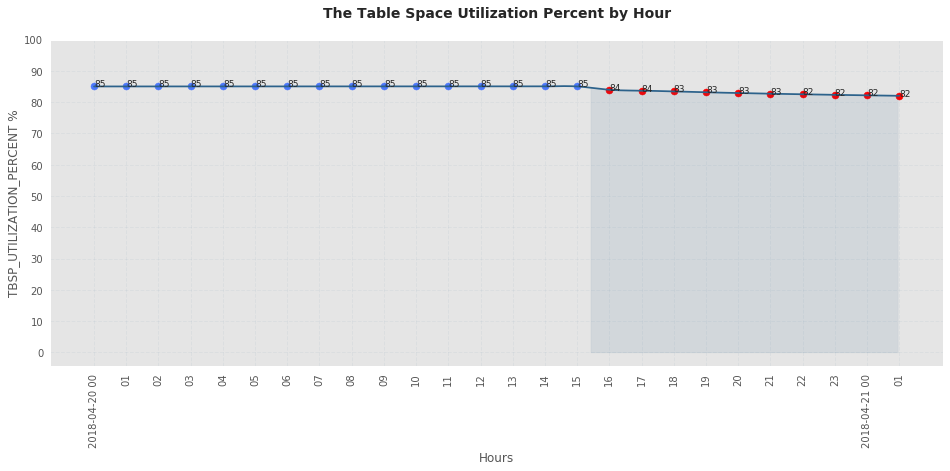

TBSP_FREE_SIZE_MB  TBSP_TOTAL_SIZE_MB  TBSP_USABLE_SIZE_MB  \
DATE       HOUR                                                               
2018-04-20 0                    24                 160                  159   
           1                    24                 160                  159   
           2                    24                 160                  159   
           3                    24                 160                  159   
           4                    24                 160                  159   
           5                    24                 160                  159   
           6                    24                 160                  159   
           7                    24                 160                  159   
           8                    24                 160                  159   
           9                    24                 160                  159   
           10                   24                 160                  159   
           11                   24                 160                  159   
           12                   24                 160                  159   
           13                   24                 160                  159   
           14                   24                 160                  159   
           15                   24                 160                  159   

                 TBSP_USED_SIZE_MB  TBSP_UTILIZATION_PERCENT  
DATE       HOUR                                               
2018-04-20 0                   135                        85  
           1                   135                        85  
           2                   135                        85  
           3                   135                        85  
           4                   135                        85  
           5                   135                        85  
           6                   135                        85  
           7                   135                        85  
           8                   135                        85  
           9                   135                        85  
           10                  135                        85  
           11                  135                        85  
           12                  135                        85  
           13                  135                        85  
           14                  135                        85  
           15                  135                        85

In [28]:
# load pandas for dataframe support and numpy for statistical manipulation support
import pandas as pd
import numpy as np

# input value of parameters to pull history data through repository view
queryCondition = "DB_CONN_ID='irww' TBSP_NAME='IRWWINDEX' END_TIME='2018-04-20-16:00:00' INTERVAL=16 REPORT_TYPE='tablespace'"

# pass the values to a variable
!echo $queryCondition > storageCondition

# get content from the variable and pass values to select statement 
# run select statment to get storage utilization data for specified tablespaces and save as a CSV file
# predict storage utilization in the near future
# display storage utilization together with preditive data in graph
%run Storage-usage-with-prediction-script.jupyter.ipynb

# set maximum rows of a table as general
pd.options.display.max_rows = 999

# define object for dataframe and pivot table
tbsp_df = None
tbsp_table = None

# check whether CSV file has been created which means select statement run successfully
# pass content of CSV to dataframe object
# draw pivot table according to dataframe
if os.path.exists("tablespace.csv") and (len(GENERAL_ERROR) == 0):
    tbsp_df = pd.read_csv("tablespace.csv", index_col=0)
    tbsp_table = pd.pivot_table(tbsp_df, index = ['DATE', 'HOUR'], fill_value=0)
    
# display pivot table
tbsp_table

### Example 3: 
This example shows how to use SQL to get top 5 database size from repository view. From the report, you can find out information about databases size over time.
* MAX_USAGE_GB: The max size of the database in GB.

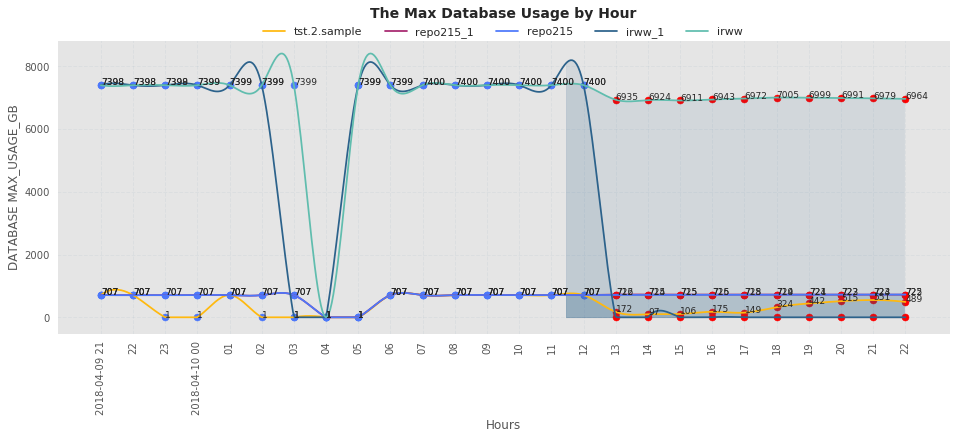

MAX_USAGE_GB  RANK
DATE       HOUR DBNAME                          
2018-04-09 21   irww               7397.68     1
                irww_1             7397.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5
           22   irww               7397.68     1
                irww_1             7397.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5
           23   irww               7397.68     2
                irww_1             7398.68     1
                repo215             707.33     3
                repo215_1           707.33     4
2018-04-10 0    irww               7398.68     1
                irww_1             7398.68     2
                repo215             707.33     3
                repo215_1           707.33     4
           1    irww               7398.68     1
                irww_1             7398.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5
           2    irww               7398.68     1
                irww_1             7398.68     2
                repo215             707.33     3
                repo215_1           707.33     4
           3    irww               7398.68     1
                repo215             707.33     2
                repo215_1           707.33     3
           5    irww               7398.68     1
                irww_1             7398.68     2
           6    irww               7398.68     1
                irww_1             7398.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5
           7    irww               7399.68     1
                irww_1             7399.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5
           8    irww               7399.68     1
                irww_1             7399.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5
           9    irww               7399.68     1
                irww_1             7399.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5
           10   irww               7399.68     1
                irww_1             7399.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5
           11   irww               7399.68     1
                irww_1             7399.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5
           12   irww               7399.68     1
                irww_1             7399.68     2
                repo215             707.33     3
                repo215_1           707.33     4
                tst.2.sample        707.33     5

In [29]:
# load pandas for dataframe support and os for
import pandas as pd
import os

# input value of parameters to pull history data through repository view
queryCondition = "DB_CONN_ID='*' END_TIME='2018-04-10-13:00:00' INTERVAL=16 REPORT_TYPE='database'"

# pass the values to a variable
!echo $queryCondition > storageCondition

# get content from the variable and pass values to select statement 
# run select statment to get storage utilization data for specified connection and save as a CSV file
# predict storage utilization in the near future
# display storage utilization together with preditive data in graph
%run Storage-usage-with-prediction-script.jupyter.ipynb


# set maximum rows of a table as general
pd.options.display.max_rows = 999

# define object for dataframe and pivot table
db_df = None
db_table = None

# check whether CSV file has been created which means select statement run successfully
# pass content of CSV to dataframe object
# draw pivot table according to dataframe
if os.path.exists("db.csv") and (len(GENERAL_ERROR) == 0):
    db_df = pd.read_csv("db.csv", index_col=0)
    db_table = pd.pivot_table(db_df,index=['DATE','HOUR','DBNAME'], fill_value=0)
    
# display pivot table
db_table